# Importing Files, Libraries, and Data Exploration

In [1]:
 #/content/micro_world_139countries.csv

import pandas as pd
df = pd.read_csv("/content/micro_world_139countries.csv", encoding='latin-1')
print(df)

            economy economycode                                    regionwb  \
0       Afghanistan         AFG                                  South Asia   
1       Afghanistan         AFG                                  South Asia   
2       Afghanistan         AFG                                  South Asia   
3       Afghanistan         AFG                                  South Asia   
4       Afghanistan         AFG                                  South Asia   
...             ...         ...                                         ...   
143882     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   
143883     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   
143884     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   
143885     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   
143886     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   

         pop_adult  wpid_random       wgt  female  

In [ ]:
# Inspect the structure and first few rows of the dataset
print(df.info())
print(df.head())


# Data Cleaning

### Display Data

In [2]:
# Import display from IPython for better visualization
from IPython.display import display

# Filter the dataset to include only Ghana-specific data
ghana_df = df[df['economy'] == 'Ghana']

# Display the filtered data in a table format
display(ghana_df.head())



,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
48595,Ghana,GHA,Sub-Saharan Africa (excluding high income),19535202.0,178645433,0.913661,2,35.0,2,5,...,4,4,4.0,2,2.0,1,1,1,0.0,2021
48596,Ghana,GHA,Sub-Saharan Africa (excluding high income),19535202.0,208110394,0.790860,2,26.0,1,3,...,4,4,4.0,2,1.0,1,1,1,0.0,2021
48597,Ghana,GHA,Sub-Saharan Africa (excluding high income),19535202.0,177511358,1.372293,1,45.0,1,3,...,4,4,4.0,2,1.0,1,2,1,0.0,2021
48598,Ghana,GHA,Sub-Saharan Africa (excluding high income),19535202.0,195768215,0.412676,2,42.0,2,1,...,4,4,4.0,4,1.0,1,2,1,1.0,2021
48599,Ghana,GHA,Sub-Saharan Africa (excluding high income),19535202.0,210047396,1.252679,2,53.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021


### Handling Missing Values

#### Display Columns with Missing Values

In [3]:
# Calculate the number of missing values for each column
missing_values = ghana_df.isnull().sum()

# Display all columns with missing values without truncation
pd.set_option('display.max_rows', None)  # Show all rows
print(missing_values[missing_values > 0])
pd.reset_option('display.max_rows')  # Reset to default after viewing


age                  4
fin1_1a            576
fin1_1b            576
fin4               769
fin4a              964
fin5               566
fin6               566
fin7               566
fin8               987
fin8a              996
fin8b              987
fin9               566
fin9a              662
fin10              566
fin10_1a          1000
fin10_1b          1000
fin10_1c          1000
fin10_1d          1000
fin10_1e          1000
fin10a             680
fin10b             566
fin11_1            750
fin11a             434
fin11b             434
fin11c             434
fin11d             434
fin11e             434
fin11f             434
fin11g             434
fin11h             434
fin13_1a           727
fin13_1b           727
fin13_1c           727
fin13_1d           727
fin13_1e           727
fin13_1f           727
fin13a             334
fin13b             334
fin13c             334
fin13d             328
fin14_2            833
fin14_2_China     1000
fin14c             888
fin14c_2   

#### Drop columns with 40% or higher missing values

In [4]:
# Calculate the percentage of missing values for each column
missing_percentage = (ghana_df.isnull().sum() / len(ghana_df)) * 100

# Identify columns with 40% or more missing values
drop_columns = missing_percentage[missing_percentage >= 40].index.tolist()

# Drop the columns from the dataset
ghana_df = ghana_df.drop(columns=drop_columns)

# Check the shape of the dataset after dropping columns
print("Shape of the dataset after dropping columns with 40% or more missing values:")
print(ghana_df.shape)


Shape of the dataset after dropping columns with 40% or more missing values:
(1000, 62)


####  Assessing Columns with 1-40% Missing Values

In [5]:
# Calculate the percentage of missing values for each remaining column
remaining_missing_percentage = (ghana_df.isnull().sum() / len(ghana_df)) * 100

# Filter to include only columns with missing values between 0% and 40%
filtered_missing = remaining_missing_percentage[(remaining_missing_percentage > 0) & (remaining_missing_percentage <= 40)]

# Dictionary to map column names to their descriptions
column_descriptions = {
    "age": "Respondent's age",
    "fin1_1a": "Opened first account to receive a wage payment",
    "fin1_1b": "Opened first account to receive money from the government",
    "fin4": "Used a debit card",
    "fin4a": "Used a debit card in-store",
    "fin5": "Used mobile phone or internet to access financial account",
    "fin6": "Used mobile phone or internet to check account balance",
    "fin7": "Has a credit card",
    "fin9": "Made any deposit into the account",
    "fin9a": "Make deposits into the account two or more times per month",
    "fin10": "Withdrew from the account",
    "fin10a": "Withdrew from the account two or more times per month",
    "fin10b": "Used account to store money",
    "fin11a": "Reason for no account: too far",
    "fin11b": "Reason for no account: too expensive",
    "fin11c": "Reason for no account: lack documentation",
    "fin11d": "Reason for no account: lack trust",
    "fin11e": "Reason for no account: religious reasons",
    "fin11f": "Reason for no account: lack money",
    "fin11g": "Reason for no account: family member already has one",
    "fin11h": "Reason for no account: no need for financial services",
    "fin13a": "Use mobile money account two or more times a month",
    "fin13b": "Use mobile money account to store money",
    "fin13c": "Use mobile money account to borrow money",
    "fin13d": "Use mobile money account without help",
    "fin17a1": "Saved using a mobile money account",
    "fin24a": "Difficulty of emergency funds in 30 days",
    "fin24b": "Difficulty of emergency funds in 7 days",
    "fin27_1": "Sent domestic remittances through an account",
    "fin29_1": "Received domestic remittances through an account",
    "fin31a": "Paid a utility bill using an account",
    "fin31b": "Paid a utility bill using a mobile phone",
    "fin33": "Received public sector wage payments",
    "fin34a": "Received wage payments into an account",
    "fin34b": "Received wage payments to a mobile phone",
    "fin42a": "Grow own crops or raise livestock",
    "fin45": "Financially worried: old age"
}

# Display the results without recommendations
print("Remaining columns with missing values (0-40%):\n")
for col, perc in filtered_missing.items():
    description = column_descriptions.get(col, "Description not available")
    print(f"- {col}: {description} - {perc:.2f}% missing")


Remaining columns with missing values (0-40%):

- age: Respondent's age - 0.40% missing
- fin13a: Use mobile money account two or more times a month - 33.40% missing
- fin13b: Use mobile money account to store money - 33.40% missing
- fin13c: Use mobile money account to borrow money - 33.40% missing
- fin13d: Use mobile money account without help - 32.80% missing
- fin17a1: Saved using a mobile money account - 27.30% missing
- fin24a: Difficulty of emergency funds in 30 days - 15.90% missing
- fin24b: Difficulty of emergency funds in 7 days - 15.90% missing
- fin27_1: Sent domestic remittances through an account - 34.60% missing
- fin29_1: Received domestic remittances through an account - 30.30% missing
- fin45: Financially worried: old age - 14.40% missing


#### Remaining Columns After Previous Cleaning

In [6]:
print("Remaining columns after previous cleaning steps:")
print(ghana_df.columns.tolist())
print(f"Total columns: {len(ghana_df.columns)}")

Remaining columns after previous cleaning steps:
['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt', 'female', 'age', 'educ', 'inc_q', 'emp_in', 'urbanicity_f2f', 'account', 'account_fin', 'account_mob', 'fin2', 'fin13a', 'fin13b', 'fin13c', 'fin13d', 'fin14_1', 'fin14a', 'fin14a1', 'fin14b', 'fin16', 'fin17a', 'fin17a1', 'fin17b', 'fin20', 'fin22a', 'fin22b', 'fin24', 'fin24a', 'fin24b', 'fin26', 'fin27_1', 'fin28', 'fin29_1', 'fin30', 'fin32', 'fin37', 'fin38', 'fin42', 'fin44a', 'fin44b', 'fin44c', 'fin44d', 'fin45', 'fin45_1', 'saved', 'borrowed', 'receive_wages', 'receive_transfers', 'receive_pension', 'receive_agriculture', 'pay_utilities', 'remittances', 'mobileowner', 'internetaccess', 'anydigpayment', 'merchantpay_dig', 'year']
Total columns: 62


#### Accessing columns with No Missing Values

##### Drop Irrelevant or Redundant Columns

In [7]:
# List of columns to drop based on relevance analysis
columns_to_drop = [
    "economy",       # Redundant after filtering for Ghana
    "economycode",   # Redundant after filtering for Ghana
    "regionwb",      # Redundant after filtering for Ghana
    "wpid_random"    # Random identifier, no analytical value
]

# Drop the identified columns
ghana_df = ghana_df.drop(columns=columns_to_drop)

# Check the shape of the dataset after dropping columns
print("Shape of the dataset after dropping irrelevant columns:")
print(ghana_df.shape)

# Display the remaining columns to ensure correct dropping
print("Remaining columns after dropping irrelevant ones:")
print(ghana_df.columns.tolist())


Shape of the dataset after dropping irrelevant columns:
(1000, 58)
Remaining columns after dropping irrelevant ones:
['pop_adult', 'wgt', 'female', 'age', 'educ', 'inc_q', 'emp_in', 'urbanicity_f2f', 'account', 'account_fin', 'account_mob', 'fin2', 'fin13a', 'fin13b', 'fin13c', 'fin13d', 'fin14_1', 'fin14a', 'fin14a1', 'fin14b', 'fin16', 'fin17a', 'fin17a1', 'fin17b', 'fin20', 'fin22a', 'fin22b', 'fin24', 'fin24a', 'fin24b', 'fin26', 'fin27_1', 'fin28', 'fin29_1', 'fin30', 'fin32', 'fin37', 'fin38', 'fin42', 'fin44a', 'fin44b', 'fin44c', 'fin44d', 'fin45', 'fin45_1', 'saved', 'borrowed', 'receive_wages', 'receive_transfers', 'receive_pension', 'receive_agriculture', 'pay_utilities', 'remittances', 'mobileowner', 'internetaccess', 'anydigpayment', 'merchantpay_dig', 'year']


#### Keep track of columns we dropped

In [8]:
# List of columns that were dropped, excluding irrelevant ones (like China-specific and redundant Ghana columns)
dropped_columns = [
    # Dropped due to high missing values (50% or more)
    "fin10_1a", "fin10_1b", "fin10_1c", "fin10_1d", "fin10_1e",
    "fin14_2", "fin14c", "fin14c_2", "fin17a1", "fin22c",
    "fin27c1", "fin27c2", "fin29c1", "fin29c2", "fin31a",
    "fin31b", "fin31b1", "fin34e", "fin39a", "fin39b",
    "fin39d", "fin39e", "fin43a", "fin43b", "fin43d", "fin43e",

    # Dropped due to moderate missing values (40% to 50%)
    "fin13a", "fin13b", "fin13c", "fin13d", "fin27_1",
    "fin29_1", "fin34d", "fin35",

    # Dropped due to lack of relevance to financial inclusion
    "fin11a", "fin11b", "fin11c", "fin11d", "fin11e",
    "fin11f", "fin11g", "fin11h", "fin17a1"
]

# Create a DataFrame for better visualization of dropped columns
dropped_df = pd.DataFrame(dropped_columns, columns=["Dropped Columns"])

# Display the list of dropped columns
print("List of Dropped Columns:")
print(dropped_df)

# Save the dropped columns to a CSV file for tracking
dropped_df.to_csv("dropped_columns_tracking.csv", index=False)
print("Dropped columns have been saved to 'dropped_columns_tracking.csv'.")


List of Dropped Columns:
   Dropped Columns
0         fin10_1a
1         fin10_1b
2         fin10_1c
3         fin10_1d
4         fin10_1e
5          fin14_2
6           fin14c
7         fin14c_2
8          fin17a1
9           fin22c
10         fin27c1
11         fin27c2
12         fin29c1
13         fin29c2
14          fin31a
15          fin31b
16         fin31b1
17          fin34e
18          fin39a
19          fin39b
20          fin39d
21          fin39e
22          fin43a
23          fin43b
24          fin43d
25          fin43e
26          fin13a
27          fin13b
28          fin13c
29          fin13d
30         fin27_1
31         fin29_1
32          fin34d
33           fin35
34          fin11a
35          fin11b
36          fin11c
37          fin11d
38          fin11e
39          fin11f
40          fin11g
41          fin11h
42         fin17a1
Dropped columns have been saved to 'dropped_columns_tracking.csv'.


### Fill Missing Values with Median (Numerical) and Mode (Categorical)

In [9]:
# Handling missing values using median for numerical and mode for categorical columns

# Separate numerical and categorical columns
numerical_columns = ghana_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = ghana_df.select_dtypes(include=['object', 'category']).columns

# Apply median imputation for numerical columns
for col in numerical_columns:
    median_value = ghana_df[col].median()
    ghana_df[col].fillna(median_value, inplace=True)

# Apply mode imputation for categorical columns
for col in categorical_columns:
    mode_value = ghana_df[col].mode()[0]  # Taking the first mode if there are multiple
    ghana_df[col].fillna(mode_value, inplace=True)

# Check if there are still any missing values left
print("Remaining missing values after imputation:")
print(ghana_df.isnull().sum())


Remaining missing values after imputation:
pop_adult              0
wgt                    0
female                 0
age                    0
educ                   0
inc_q                  0
emp_in                 0
urbanicity_f2f         0
account                0
account_fin            0
account_mob            0
fin2                   0
fin13a                 0
fin13b                 0
fin13c                 0
fin13d                 0
fin14_1                0
fin14a                 0
fin14a1                0
fin14b                 0
fin16                  0
fin17a                 0
fin17a1                0
fin17b                 0
fin20                  0
fin22a                 0
fin22b                 0
fin24                  0
fin24a                 0
fin24b                 0
fin26                  0
fin27_1                0
fin28                  0
fin29_1                0
fin30                  0
fin32                  0
fin37                  0
fin38                  0
fin42  

<ipython-input-9-bfd42771aa2c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ghana_df[col].fillna(median_value, inplace=True)


#### Check Duplicates

In [10]:
# Checking for duplicate rows
print("Number of duplicate rows before removal:", ghana_df.duplicated().sum())

# Remove duplicate rows if any
ghana_df = ghana_df.drop_duplicates()

# Check the shape after removing duplicates
print("Shape of the dataset after duplicate removal:", ghana_df.shape)


Number of duplicate rows before removal: 0
Shape of the dataset after duplicate removal: (1000, 58)


In [11]:
# Display all columns in the dataset after dropping duplicates
print("Current columns in the dataset after dropping duplicates:")
print(ghana_df.columns.tolist())
print(f"Total number of columns: {len(ghana_df.columns)}")


Current columns in the dataset after dropping duplicates:
['pop_adult', 'wgt', 'female', 'age', 'educ', 'inc_q', 'emp_in', 'urbanicity_f2f', 'account', 'account_fin', 'account_mob', 'fin2', 'fin13a', 'fin13b', 'fin13c', 'fin13d', 'fin14_1', 'fin14a', 'fin14a1', 'fin14b', 'fin16', 'fin17a', 'fin17a1', 'fin17b', 'fin20', 'fin22a', 'fin22b', 'fin24', 'fin24a', 'fin24b', 'fin26', 'fin27_1', 'fin28', 'fin29_1', 'fin30', 'fin32', 'fin37', 'fin38', 'fin42', 'fin44a', 'fin44b', 'fin44c', 'fin44d', 'fin45', 'fin45_1', 'saved', 'borrowed', 'receive_wages', 'receive_transfers', 'receive_pension', 'receive_agriculture', 'pay_utilities', 'remittances', 'mobileowner', 'internetaccess', 'anydigpayment', 'merchantpay_dig', 'year']
Total number of columns: 58


### Accessing Outliers and Invalid Responses

In [12]:
# Validity check for numerical columns: age, pop_adult, wgt, inc_q

# Step 1: Age - Check for unrealistic values (e.g., age > 100 or age < 0)
invalid_age = ghana_df[(ghana_df['age'] < 0) | (ghana_df['age'] > 100)]
print("Invalid Age Entries:")
print(invalid_age)

# Step 2: Population of Adults (pop_adult) - Check for negative or zero values
invalid_pop_adult = ghana_df[ghana_df['pop_adult'] <= 0]
print("\nInvalid Population of Adults Entries:")
print(invalid_pop_adult)

# Step 3: Weight (wgt) - Check for negative or zero values
invalid_wgt = ghana_df[ghana_df['wgt'] <= 0]
print("\nInvalid Weight Entries:")
print(invalid_wgt)

# Step 4: Income Quintile (inc_q) - Check for values outside the range 1-5
invalid_inc_q = ghana_df[(ghana_df['inc_q'] < 1) | (ghana_df['inc_q'] > 5)]
print("\nInvalid Income Quintile Entries:")
print(invalid_inc_q)

# Print a summary of the validity check
print("\nSummary of Invalid Entries:")
print(f"Number of invalid age entries: {len(invalid_age)}")
print(f"Number of invalid pop_adult entries: {len(invalid_pop_adult)}")
print(f"Number of invalid weight entries: {len(invalid_wgt)}")
print(f"Number of invalid income quintile entries: {len(invalid_inc_q)}")


Invalid Age Entries:
Empty DataFrame
Columns: [pop_adult, wgt, female, age, educ, inc_q, emp_in, urbanicity_f2f, account, account_fin, account_mob, fin2, fin13a, fin13b, fin13c, fin13d, fin14_1, fin14a, fin14a1, fin14b, fin16, fin17a, fin17a1, fin17b, fin20, fin22a, fin22b, fin24, fin24a, fin24b, fin26, fin27_1, fin28, fin29_1, fin30, fin32, fin37, fin38, fin42, fin44a, fin44b, fin44c, fin44d, fin45, fin45_1, saved, borrowed, receive_wages, receive_transfers, receive_pension, receive_agriculture, pay_utilities, remittances, mobileowner, internetaccess, anydigpayment, merchantpay_dig, year]
Index: []

[0 rows x 58 columns]

Invalid Population of Adults Entries:
Empty DataFrame
Columns: [pop_adult, wgt, female, age, educ, inc_q, emp_in, urbanicity_f2f, account, account_fin, account_mob, fin2, fin13a, fin13b, fin13c, fin13d, fin14_1, fin14a, fin14a1, fin14b, fin16, fin17a, fin17a1, fin17b, fin20, fin22a, fin22b, fin24, fin24a, fin24b, fin26, fin27_1, fin28, fin29_1, fin30, fin32, fin37, f

#### Encode Categorical Variables to Numerical for Logistic Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify binary and multi-category categorical columns
binary_cols = ['female', 'mobileowner', 'internetaccess', 'account_fin', 'account_mob']
multi_category_cols = ['educ', 'urbanicity_f2f', 'emp_in']

# Apply Label Encoding to binary categorical variables
label_encoder = LabelEncoder()
for col in binary_cols:
    ghana_df[col] = label_encoder.fit_transform(ghana_df[col])

# Apply One-Hot Encoding to multi-category categorical variables
ghana_df = pd.get_dummies(ghana_df, columns=multi_category_cols, drop_first=True)

# Display the updated DataFrame to check the encoded columns
print("Data after encoding categorical variables:")
print(ghana_df.head())


Data after encoding categorical variables:
        pop_adult       wgt  female   age  inc_q  account  account_fin  \
48595  19535202.0  0.913661       1  35.0      5        1            1   
48596  19535202.0  0.790860       1  26.0      3        1            1   
48597  19535202.0  1.372293       0  45.0      3        1            1   
48598  19535202.0  0.412676       1  42.0      1        1            1   
48599  19535202.0  1.252679       1  53.0      3        0            0   

       account_mob  fin2  fin13a  ...  mobileowner  internetaccess  \
48595            1     2     2.0  ...            0               0   
48596            1     1     1.0  ...            0               0   
48597            0     2     1.0  ...            0               1   
48598            1     2     1.0  ...            0               1   
48599            0     2     1.0  ...            0               1   

       anydigpayment  merchantpay_dig  year  educ_2  educ_3  educ_5  \
48595              1

#### Convert Boolean Values to Integers and Verify Data Types

In [13]:
# Convert boolean columns to integers (0 and 1) using map to avoid deprecation warning
ghana_df = ghana_df.apply(lambda x: x.map({True: 1, False: 0}) if x.dtypes == 'bool' else x)

# Verify the data types of all columns after conversion
print("Data types after converting boolean to integers (using map):")
print(ghana_df.dtypes)

# Check the first few rows to confirm the changes
print("\nSample data after conversion:")
print(ghana_df.head())


Data types after converting boolean to integers (using map):
pop_adult              float64
wgt                    float64
female                   int64
age                    float64
educ                     int64
inc_q                    int64
emp_in                 float64
urbanicity_f2f         float64
account                  int64
account_fin              int64
account_mob            float64
fin2                     int64
fin13a                 float64
fin13b                 float64
fin13c                 float64
fin13d                 float64
fin14_1                  int64
fin14a                   int64
fin14a1                  int64
fin14b                   int64
fin16                    int64
fin17a                   int64
fin17a1                float64
fin17b                 float64
fin20                    int64
fin22a                   int64
fin22b                   int64
fin24                    int64
fin24a                 float64
fin24b                 float64
fin26    

#### Apply StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns that need scaling
numerical_cols = ['pop_adult', 'wgt', 'age']

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying the scaler to the numerical columns
ghana_df[numerical_cols] = scaler.fit_transform(ghana_df[numerical_cols])

# Displaying the scaled data to verify the transformation
print("Data after scaling numerical features:")
print(ghana_df[numerical_cols].head())


Data after scaling numerical features:
       pop_adult       wgt       age
48595        0.0 -0.124867  0.236888
48596        0.0 -0.302468 -0.480713
48597        0.0  0.538427  1.034223
48598        0.0 -0.849415  0.795023
48599        0.0  0.365435  1.672092


#### Check mean and standard deviation of scaled columns

In [ ]:
# Checking the mean and standard deviation of scaled columns
print("Mean of scaled columns:")
print(ghana_df[numerical_cols].mean())

print("\nStandard deviation of scaled columns:")
print(ghana_df[numerical_cols].std())

# Displaying a few rows to see the scaled data
print("\nSample scaled data:")
print(ghana_df[numerical_cols].head())


Mean of scaled columns:
pop_adult    0.000000e+00
wgt          1.776357e-17
age         -2.646772e-16
dtype: float64

Standard deviation of scaled columns:
pop_adult    0.0000
wgt          1.0005
age          1.0005
dtype: float64

Sample scaled data:
       pop_adult       wgt       age
48595        0.0 -0.124867  0.236888
48596        0.0 -0.302468 -0.480713
48597        0.0  0.538427  1.034223
48598        0.0 -0.849415  0.795023
48599        0.0  0.365435  1.672092


##### Save cleaned dataframe

In [ ]:
# Save the final cleaned dataset to a new variable
ghana_cleaned_df = ghana_df.copy()


# Logistic Regression Model 1

### Data Preprocessing

#### Drop Problematic columns

Dropping problematic variables that make the model too easy to predict
These variables directly indicate account ownership or usage, which biases the model.

In [ ]:
# Drop Irrelevant or Problematic Columns
columns_to_drop = [
    # High Risk of Bias
    'account_mob', 'anydigpayment', 'merchantpay_dig', 'receive_wages', 'receive_transfers',
    'receive_pension', 'receive_agriculture', 'pay_utilities', 'remittances', 'fin17a',
    'fin17a1', 'fin32', 'fin37', 'fin38', 'saved', 'borrowed', 'fin42', 'mobileowner',
    'internetaccess', 'wgt', 'account', 'fin2', 'fin13a', 'fin13b', 'fin13c', 'fin13d',
    'fin14_1', 'fin14a', 'fin14a1', 'fin14b', 'fin16', 'fin17b', 'fin20', 'fin22a',
    'fin24', 'fin24a', 'fin24b', 'fin26', 'fin27_1', 'fin28', 'fin29_1', 'fin30', 'pop_adult',
    'year',
    # Financial Worry Variables
    'fin44a', 'fin44b', 'fin44c', 'fin44d', 'fin45', 'fin45_1'
]

# Drop the columns from the dataset
ghana_df = ghana_df.drop(columns=columns_to_drop)

# Check the shape of the dataset after dropping columns
print("Shape of the dataset after dropping specified columns:")
print(ghana_df.shape)

# Display the remaining columns to ensure correctness
print("Remaining columns after dropping specified ones:")
print(ghana_df.columns.tolist())


Shape of the dataset after dropping specified columns:
(1000, 10)
Remaining columns after dropping specified ones:
['female', 'age', 'inc_q', 'account_fin', 'fin22b', 'educ_2', 'educ_3', 'educ_5', 'urbanicity_f2f_2.0', 'emp_in_2.0']


##### Feature Engineering

In [ ]:
# Feature Engineering: Creating interaction terms
ghana_df['income_education'] = ghana_df['inc_q'] * (ghana_df['educ_2'] + ghana_df['educ_3'])
ghana_df['urban_employment'] = ghana_df['urbanicity_f2f_2.0'] * ghana_df['emp_in_2.0']

# Display the new columns to verify
print("New interaction columns added:")
print(ghana_df[['income_education', 'urban_employment']].head())


New interaction columns added:
       income_education  urban_employment
48595                 5                 1
48596                 0                 0
48597                 0                 0
48598                 1                 0
48599                 0                 0


#### Step 1: Splitting the Data - Training and Testing Sets for account_fin

##### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the dependent variable (target) and independent variables (features)
X = ghana_df.drop(columns=['account_fin'])  # All columns except the target variable 'account_fin'
y = ghana_df['account_fin']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verifying the shape of the training and testing data
print("Training data shape (X):", X_train.shape)
print("Testing data shape (X):", X_test.shape)
print("Training data shape (y):", y_train.shape)
print("Testing data shape (y):", y_test.shape)


Training data shape (X): (800, 11)
Testing data shape (X): (200, 11)
Training data shape (y): (800,)
Testing data shape (y): (200,)


##### Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters and their values for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],         # Use L2 regularization
    'solver': ['liblinear', 'lbfgs'],  # Suitable solvers for L2
    'max_iter': [100, 500, 1000]       # Number of iterations
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_

print("Best hyperparameters:")
print(best_params)

# Predict using the best model
y_pred = best_log_reg.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the optimized Logistic Regression model: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Best hyperparameters:
{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy of the optimized Logistic Regression model: 77.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       110
           1       0.76      0.71      0.74        90

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.77       200
weighted avg       0.77      0.77      0.77       200



##### K Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model with the best hyperparameters from GridSearchCV
best_log_reg = LogisticRegression(
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    random_state=42
)

# Perform K-Fold Cross-Validation (using 5 folds)
k = 5
cv_scores = cross_val_score(best_log_reg, X, y, cv=k, scoring='accuracy')

# Display the cross-validation scores
print(f"K-Fold Cross-Validation (k={k}) accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation: {cv_scores.std() * 100:.2f}%")


K-Fold Cross-Validation (k=5) accuracy scores: [0.74  0.705 0.71  0.735 0.71 ]
Mean accuracy: 72.00%
Standard deviation: 1.45%


Step 2: Initializing Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize the Logistic Regression model with the best hyperparameters
final_log_reg = LogisticRegression(
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    random_state=42
)

# Step 2: Train the model on the entire training data
final_log_reg.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred_final = final_log_reg.predict(X_test)

# Step 4: Evaluate the final model
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Accuracy of the Optimized Logistic Regression model: {final_accuracy * 100:.2f}%\n")

# Step 5: Detailed classification report
print("Final Classification Report:")
print(classification_report(y_test, y_pred_final))


Final Accuracy of the Optimized Logistic Regression model: 77.00%

Final Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       110
           1       0.76      0.71      0.74        90

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.77       200
weighted avg       0.77      0.77      0.77       200



# Model Interpretation

#### Confusion Matrix

<Figure size 600x600 with 0 Axes>

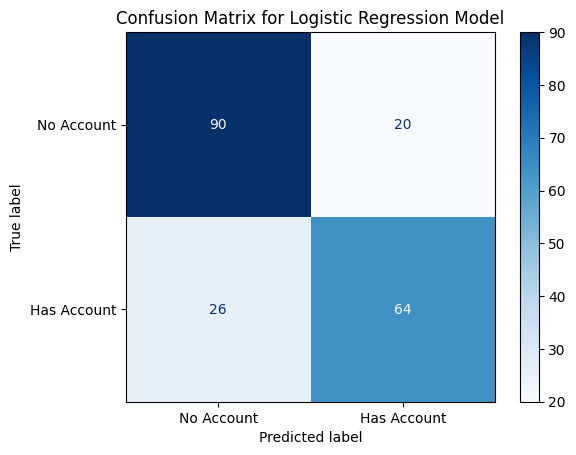

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Account', 'Has Account'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()


#### Odds Ratios

Coefficients and Odds Ratios:
              Variable  Coefficient  Odds Ratio
5               educ_3     2.061229    7.855615
8           emp_in_2.0    -1.434250    0.238294
6               educ_5     1.376808    3.962233
7   urbanicity_f2f_2.0     0.707611    2.029137
10    urban_employment     0.544752    1.724181
0               female     0.284625    1.329264
4               educ_2     0.283927    1.328336
1                  age     0.214403    1.239122
9     income_education     0.211555    1.235598
2                inc_q     0.148974    1.160643
3               fin22b     0.028159    1.028559


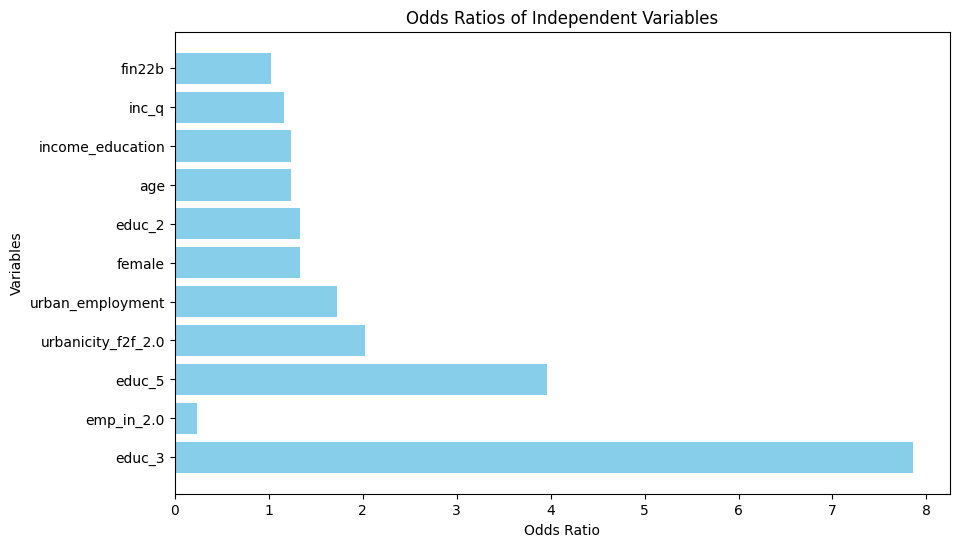

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Step 1: Fit the logistic regression model again using the best hyperparameters
log_reg = LogisticRegression(
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    random_state=42
)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Step 2: Extract coefficients and calculate odds ratios
coefficients = log_reg.coef_[0]
odds_ratios = np.exp(coefficients)

# Create a DataFrame to organize coefficients and odds ratios
coeff_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# Sort by the absolute value of coefficients for better visualization
coeff_df = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the coefficients and odds ratios
print("Coefficients and Odds Ratios:")
print(coeff_df)

# Step 3: Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Variable'], coeff_df['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Variables')
plt.title('Odds Ratios of Independent Variables')
plt.show()


# Model 2 Logistic Regression

### Data Preprocessing

### Drop Irrelevant Columns

In [ ]:
# Drop Irrelevant or Problematic Columns for Borrowing Model
columns_to_drop = [
    # High Risk of Bias
    'account_mob', 'anydigpayment', 'merchantpay_dig', 'receive_wages', 'receive_transfers',
    'receive_pension', 'receive_agriculture', 'pay_utilities', 'remittances', 'fin17a',
    'fin17a1', 'fin32', 'fin37', 'fin38', 'saved', 'borrowed', 'fin42', 'mobileowner',
    'internetaccess', 'wgt', 'account', 'fin2', 'fin13a', 'fin13b', 'fin13c', 'fin13d',
    'fin14_1', 'fin14a', 'fin14a1', 'fin14b', 'fin16', 'fin17b', 'fin20',
    'fin24', 'fin24a', 'fin24b', 'fin26', 'fin27_1', 'fin28', 'fin29_1', 'fin30', 'pop_adult',
    'year',
    # Financial Worry Variables
    'fin44a', 'fin44b', 'fin44c', 'fin44d', 'fin45', 'fin45_1',
    # Target from previous model
    #'account_fin'
]

# Create a working copy and drop columns
ghana_df_borrowing = ghana_cleaned_df.copy()
ghana_df_borrowing = ghana_df_borrowing.drop(columns=[col for col in columns_to_drop if col in ghana_df_borrowing.columns])

# Drop rows with missing target values
ghana_df_borrowing = ghana_df_borrowing.dropna(subset=['fin22a'])

# Display structure
print("Shape of dataset after column removal and NA drop:", ghana_df_borrowing.shape)
print("Remaining columns:\n", ghana_df_borrowing.columns.tolist())


Shape of dataset after column removal and NA drop: (1000, 11)
Remaining columns:
 ['female', 'age', 'inc_q', 'account_fin', 'fin22a', 'fin22b', 'educ_2', 'educ_3', 'educ_5', 'urbanicity_f2f_2.0', 'emp_in_2.0']


### Feature Engineering

In [ ]:
# Feature Engineering: Creating interaction terms for the borrowing model
ghana_df_borrowing['income_education'] = ghana_df_borrowing['inc_q'] * (
    ghana_df_borrowing['educ_2'] + ghana_df_borrowing['educ_3']
)
ghana_df_borrowing['urban_employment'] = ghana_df_borrowing['urbanicity_f2f_2.0'] * ghana_df_borrowing['emp_in_2.0']

# Display the new columns to verify
print("New interaction columns added:")
print(ghana_df_borrowing[['income_education', 'urban_employment']].head())


New interaction columns added:
       income_education  urban_employment
48595                 5                 1
48596                 0                 0
48597                 0                 0
48598                 1                 0
48599                 0                 0


### Train-Test Split

In [ ]:
#Make fin22a column Binary Data
ghana_df_borrowing['borrowed_binary'] = ghana_df_borrowing['fin22a'].apply(lambda x: 1 if x == 1 else 0)


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and binary target variable
X = ghana_df_borrowing.drop(columns=['fin22a', 'borrowed_binary'])
y = ghana_df_borrowing['borrowed_binary']

# Split into training and testing sets WITHOUT stratify to avoid error
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Output shape confirmation
print("Training data shape (X):", X_train.shape)
print("Testing data shape (X):", X_test.shape)
print("Training data shape (y):", y_train.shape)
print("Testing data shape (y):", y_test.shape)


Training data shape (X): (800, 12)
Testing data shape (X): (200, 12)
Training data shape (y): (800,)
Testing data shape (y): (200,)


#### Hyperparmeter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters and their values for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],        # Use L2 regularization
    'solver': ['liblinear', 'lbfgs'],  # Suitable solvers for L2
    'max_iter': [100, 500, 1000]       # Number of iterations
}

# Initialize the logistic regression model with class_weight balanced
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_

print("Best hyperparameters:")
print(best_params)

# Predict using the best model
y_pred = best_log_reg.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the optimized Logistic Regression model: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Best hyperparameters:
{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of the optimized Logistic Regression model: 67.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       185
           1       0.15      0.73      0.25        15

    accuracy                           0.68       200
   macro avg       0.56      0.70      0.52       200
weighted avg       0.91      0.68      0.75       200



#### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model with the best hyperparameters and class_weight
best_log_reg = LogisticRegression(
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    class_weight='balanced',  # 👈 Add this
    random_state=42
)

# Perform K-Fold Cross-Validation (using 5 folds)
k = 5
cv_scores = cross_val_score(best_log_reg, X, y, cv=k, scoring='accuracy')

# Display the cross-validation scores
print(f"K-Fold Cross-Validation (k={k}) accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation: {cv_scores.std() * 100:.2f}%")


K-Fold Cross-Validation (k=5) accuracy scores: [0.715 0.695 0.66  0.675 0.735]
Mean accuracy: 69.60%
Standard deviation: 2.69%


#### Initiliaze Logisitic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize the Logistic Regression model with best hyperparameters and balanced class weight
final_log_reg = LogisticRegression(
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    class_weight='balanced',  # 👈 Add this
    random_state=42
)

# Step 2: Train the model on the entire training data
final_log_reg.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred_final = final_log_reg.predict(X_test)

# Step 4: Evaluate the final model
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Accuracy of the Optimized Logistic Regression model: {final_accuracy * 100:.2f}%\n")

# Step 5: Detailed classification report
print("Final Classification Report:")
print(classification_report(y_test, y_pred_final))


Final Accuracy of the Optimized Logistic Regression model: 67.50%

Final Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       185
           1       0.15      0.73      0.25        15

    accuracy                           0.68       200
   macro avg       0.56      0.70      0.52       200
weighted avg       0.91      0.68      0.75       200



# Model Interpetation

<Figure size 600x600 with 0 Axes>

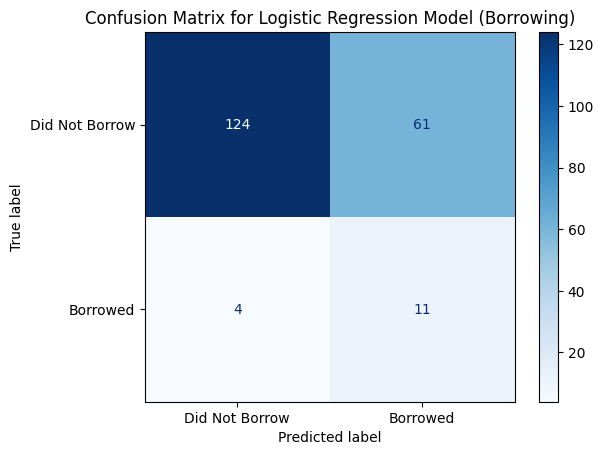

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Borrow', 'Borrowed'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression Model (Borrowing)")
plt.show()


#  Odds Ratios and Coefficients

Coefficients and Odds Ratios:
              Variable  Coefficient  Odds Ratio
9           emp_in_2.0    -2.792391    0.061275
3          account_fin     2.131093    8.424068
11    urban_employment     2.092169    8.102472
7               educ_5    -1.690992    0.184337
6               educ_3     1.333408    3.793952
4               fin22b    -0.723798    0.484907
0               female    -0.298814    0.741698
8   urbanicity_f2f_2.0    -0.258979    0.771840
1                  age     0.254059    1.289248
5               educ_2    -0.061177    0.940657
10    income_education    -0.035631    0.964996
2                inc_q     0.033897    1.034478


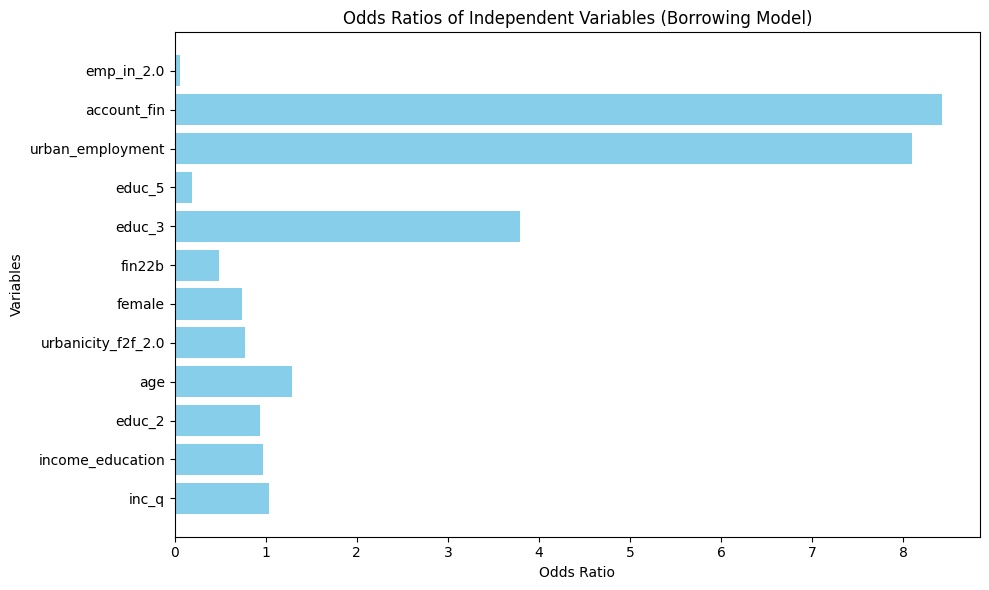

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Step 1: Fit the logistic regression model again using the best hyperparameters and class_weight
log_reg = LogisticRegression(
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    class_weight='balanced',
    random_state=42
)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Step 2: Extract coefficients and calculate odds ratios
coefficients = log_reg.coef_[0]
odds_ratios = np.exp(coefficients)

# Create a DataFrame to organize coefficients and odds ratios
coeff_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# Sort by the absolute value of coefficients for better visualization
coeff_df = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the coefficients and odds ratios
print("Coefficients and Odds Ratios:")
print(coeff_df)

# Step 3: Visualize the odds ratios
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Variable'], coeff_df['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Variables')
plt.title('Odds Ratios of Independent Variables (Borrowing Model)')
plt.gca().invert_yaxis()  # Optional: highest at the top
plt.tight_layout()
plt.show()


In [ ]:
print(ghana_df_borrowing['fin22a'].unique())


[2 1 3 4]


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train.select_dtypes(include='number'))
pd.DataFrame({
    'Feature': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})


,Feature,VIF
0,const,30.500188
1,female,1.062013
2,age,1.078099
3,inc_q,3.724467
4,account_fin,1.304382
5,fin22b,1.013835
6,educ_2,6.723833
7,educ_3,3.121701
8,educ_5,1.023059
9,urbanicity_f2f_2.0,1.382494


ModuleNotFoundError: No module named 'qrcode'